Importing of Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from nltk.tokenize.toktok import ToktokTokenizer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("IMDB.csv")

EDA process


In [ ]:
df.head()


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df.describe()


review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull()

review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]

Here Valuecount is used to find the number of Positive and Negative values in the sentiment column.


In [ ]:
df['sentiment'].value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

Text normalization

In [ ]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

Stemming

In [ ]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

Using of Stopwords to remove the words that donot add much value.

In [ ]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords

#Apply function on review column


{'her', 'than', "it's", "mustn't", 'during', 'having', 'haven', 'itself', 'she', "that'll", "shouldn't", 'his', "you'd", "won't", 'until', 'just', 'herself', "should've", 'further', 'over', "aren't", 'all', "weren't", 'some', 'on', 'doesn', 'won', 'hers', 'too', 've', 'if', 'myself', "doesn't", 'isn', 'a', 'those', 'ain', 'such', 'can', 'here', 'why', 'both', 'yours', 'll', 'then', 'more', 'couldn', 'where', 'most', "hadn't", 'which', 's', 'so', 'needn', 'again', "shan't", 'for', 'about', 'are', "mightn't", 'ourselves', 'by', 'above', 'through', 'other', 'own', 'he', 'it', 'was', 'once', 'they', "you're", 'with', 'didn', 'or', 'should', "don't", 'you', 'shouldn', "isn't", 'mustn', 'of', 'there', 'him', 'their', 'do', 'ours', 'now', 'were', 'theirs', 'after', 'being', 'and', "you've", 'under', 'when', 'these', 'against', "you'll", 'has', 'each', 'is', 'only', 'yourself', 'himself', 'hadn', "wouldn't", 'doing', 'out', 'mightn', "wasn't", 'to', 'weren', 'o', 'any', "didn't", 'not', 'shan'

These are the words that donot add much values in the sentence.

Lets remove the unwanted words from sentence using Stopwords.

In [ ]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
df['review']=df['review'].apply(remove_stopwords)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


Split the sentiment data

In [ ]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Let us remove the special character using remove_digits.

In [ ]:
import re

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
df.review.value_counts()

love today  show    wa varieti sole cook  would great   veri stimul captivating  alway keep viewer peek around corner see wa come next earth person get  like one us made show enjoyable special guests  friend well made nice surpris too love  first  theme audienc wa invit play along too must admit wa shock see come time limit things  golli  write recip down save time kitchen mean time family  tune yet  find channel time  assur  disappointed                                                                                                                                                                                                                                                                                                                                                                                                           5
hilarious  clean  lighthearted  quoteworthy els ask film  thi alltime  number one favorit movie ever sinc wa littl girl   v dream blue van flame observ bubblebr 

Defining two columns into X and Y.

In [ ]:
x = df["review"]
y = df["sentiment"]

In [ ]:
x

0        one review ha mention watch 1 Oz episod  hooke...
1        wonder littl production br  br  the film techn...
2        thought thi wa wonder way spend time hot summe...
3        basic  famili littl boy  jake  think  zombi hi...
4        petter mattei   love time money  visual stun f...
                               ...                        
49995    thought thi movi right good job  creativ origi...
49996    bad plot  bad dialogue  bad acting  idiot dire...
49997    cathol taught parochi elementari school nuns  ...
49998     go disagre previou comment side maltin thi on...
49999    one expect star trek movi high art  fan expect...
Name: review, Length: 50000, dtype: object

In [ ]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [ ]:
nltk.download('punkt')

sentlen = []

for sent in df["review"]:
  sentlen.append(len(word_tokenize(sent)))

df["sent_len"]= sentlen

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

review sentiment  sent_len
0  one review ha mention watch 1 Oz episod  hooke...  positive       176
1  wonder littl production br  br  the film techn...  positive       100
2  thought thi wa wonder way spend time hot summe...  positive        97
3  basic  famili littl boy  jake  think  zombi hi...  negative        77
4  petter mattei   love time money  visual stun f...  positive       138

In [ ]:
max(sentlen)

1508

In [ ]:
np.quantile(sentlen,0.95)

339.0

In [ ]:
max_len = 465

Using of Train Test method.

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)

Ploting of Positive words.

In [ ]:
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod  hooked right  thi exactli happen mebr  br  the first thing struck Oz wa brutal unflinch scene violence  set right word go trust  thi show faint heart timid thi show pull punch regard drugs  sex violence hardcore  classic use wordbr  br  it call OZ nicknam given oswald maximum secur state penitentary focus mainli emerald city  experiment section prison cell glass front face inwards  privaci high agenda Em citi home many  aryans  muslims  gangstas  latinos  christians  italians  irish  scuffles  death stares  dodgi deal shadi agreement never far awaybr  br  i would say main appeal show due fact goe show  dare forget pretti pictur paint mainstream audiences  forget charm  forget romance  oz  mess around first episod ever saw struck nasti wa surreal   say wa readi  watch  develop tast oz  got accustom high level graphic violence violence  injustic  crook guard  sold nickel  inmat  kill order get away  well mannered  middl class inmat turn prison bi

Ploting of Positive words

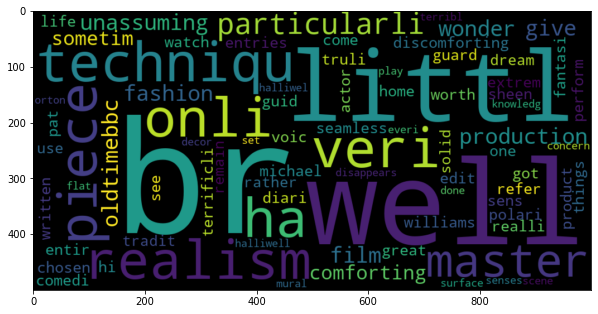

In [ ]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

Ploting of Negative Words.

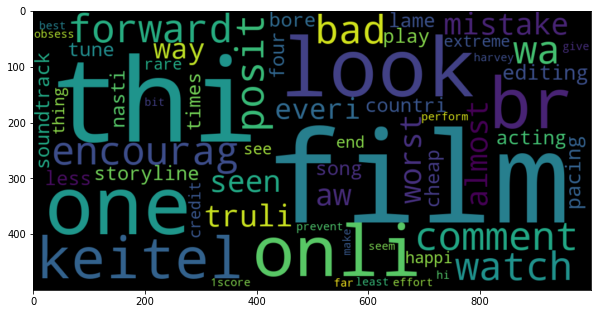

In [ ]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

tok.index_word assigns every word in each number

In [ ]:
tok.index_word

{1: 'thi',
 2: 'br',
 3: 'wa',
 4: 'film',
 5: 'movi',
 6: 'hi',
 7: 'one',
 8: 'like',
 9: 'ha',
 10: 'good',
 11: 'make',
 12: 'get',
 13: 'time',
 14: 'veri',
 15: 'see',
 16: 'watch',
 17: 'even',
 18: 'would',
 19: 'movie',
 20: 'onli',
 21: 'realli',
 22: 'charact',
 23: 'well',
 24: 'show',
 25: 'much',
 26: 'look',
 27: 'scene',
 28: 'stori',
 29: 'great',
 30: 'also',
 31: 'bad',
 32: 'go',
 33: 'becaus',
 34: 'love',
 35: 'first',
 36: 'think',
 37: 'play',
 38: 'end',
 39: 'way',
 40: 'could',
 41: 'made',
 42: 'thing',
 43: 'peopl',
 44: 'the',
 45: 'ani',
 46: 'know',
 47: 'say',
 48: 'seem',
 49: 'it',
 50: 'act',
 51: 'two',
 52: 'plot',
 53: 'mani',
 54: 'seen',
 55: 'want',
 56: 'take',
 57: 'never',
 58: 'come',
 59: 'work',
 60: 'best',
 61: 'tri',
 62: 'littl',
 63: 'life',
 64: 'ever',
 65: 'give',
 66: 'better',
 67: 'actor',
 68: 'man',
 69: 'doe',
 70: 'still',
 71: 'find',
 72: 'year',
 73: 'v',
 74: 'use',
 75: 'feel',
 76: 'lot',
 77: 'back',
 78: 'part',
 79

In [ ]:
vocab_len = len(tok.index_word)

In [ ]:
seq_train = tok.texts_to_sequences(xtrain)
seq_train

[[594,
  434,
  778,
  363,
  823,
  236,
  1914,
  1325,
  765,
  9,
  1177,
  913,
  21076,
  708,
  758,
  51,
  4,
  558,
  236,
  1914,
  5142,
  1419,
  51,
  970],
 [7,
  177,
  4,
  54,
  766,
  1395,
  124,
  27,
  21,
  31,
  50,
  30,
  165,
  20,
  10,
  107,
  1790,
  5457,
  78,
  1,
  69,
  2224,
  4,
  14,
  25,
  105,
  834,
  4,
  1791,
  614,
  1524,
  919,
  11985,
  239,
  211,
  184,
  171,
  290,
  197,
  12,
  590,
  27501,
  230,
  1,
  4,
  799,
  16,
  827,
  1968,
  1968,
  386,
  27502,
  1252,
  77,
  147,
  9875,
  2,
  2,
  21,
  3224,
  2,
  2561],
 [10922,
  7,
  4,
  3941,
  944,
  2836,
  152,
  208,
  13,
  143,
  139,
  368,
  28,
  4,
  348,
  125,
  809,
  68,
  6688,
  3,
  357,
  790,
  1964,
  130,
  1335,
  108,
  213,
  1380,
  4687,
  1256,
  1348,
  6689,
  2,
  367,
  772,
  25384,
  4592,
  463,
  4916,
  1933,
  16742,
  83,
  3,
  1181,
  23733,
  223,
  4,
  40,
  57,
  41,
  427,
  648,
  809,
  13,
  2339,
  5188,
  160,
  40,
  85,

In [ ]:
seq_mat_train = sequence.pad_sequences(seq_train, maxlen= max_len)

In [ ]:
seq_mat_train

array([[   0,    0,    0, ..., 1419,   51,  970],
       [   0,    0,    0, ..., 3224,    2, 2561],
       [   0,    0,    0, ...,   58,  132,  704],
       ...,
       [   0,    0,    0, ...,  954, 2208, 2464],
       [   0,    0,    0, ...,  427,    4,  131],
       [   0,    0,    0, ...,   23,  478, 2058]], dtype=int32)

In [ ]:
def model():
    model = Sequential([
        Dense(10,activation='relu'),
        Dense(6,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

using of vader analysis.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()
txt = 'i like python more than java'
txt1 = 'i hate python more than java'

In [ ]:
sia.polarity_scores(txt)

{'compound': 0.3612, 'neg': 0.0, 'neu': 0.615, 'pos': 0.385}

In [ ]:
sia.polarity_scores(txt1)

{'compound': -0.5719, 'neg': 0.481, 'neu': 0.519, 'pos': 0.0}

In [ ]:
def getSentiment(text,return_='sentiment'):
    check = ['sentiment','all','dictionary']
    sid = SentimentIntensityAnalyzer()
    dic = pd.Series(sid.polarity_scores(text))
    if return_ in check:
        if dic.compound>0:
            return 'positive'.upper(), dic
        elif dic.compound<0:
            return 'negative'.upper(), dic
    else:
        print(f'Invalid return it should be one of the following \n {(", ".join(check).title())}')

In [ ]:
getSentiment(txt1,return_='d')

Invalid return it should be one of the following 
 Sentiment, All, Dictionary


In [ ]:
df

review sentiment  sent_len
0      one review ha mention watch 1 Oz episod  hooke...  positive       176
1      wonder littl production br  br  the film techn...  positive       100
2      thought thi wa wonder way spend time hot summe...  positive        97
3      basic  famili littl boy  jake  think  zombi hi...  negative        77
4      petter mattei   love time money  visual stun f...  positive       138
...                                                  ...       ...       ...
49995  thought thi movi right good job  creativ origi...  positive        94
49996  bad plot  bad dialogue  bad acting  idiot dire...  negative        70
49997  cathol taught parochi elementari school nuns  ...  negative       130
49998   go disagre previou comment side maltin thi on...  negative       123
49999  one expect star trek movi high art  fan expect...  negative        75

[50000 rows x 3 columns]

In [ ]:
df['sentiments'] = df.review.apply(getSentiment)

In [ ]:
df

review sentiment  sent_len  \
0      one review ha mention watch 1 Oz episod  hooke...  positive       176   
1      wonder littl production br  br  the film techn...  positive       100   
2      thought thi wa wonder way spend time hot summe...  positive        97   
3      basic  famili littl boy  jake  think  zombi hi...  negative        77   
4      petter mattei   love time money  visual stun f...  positive       138   
...                                                  ...       ...       ...   
49995  thought thi movi right good job  creativ origi...  positive        94   
49996  bad plot  bad dialogue  bad acting  idiot dire...  negative        70   
49997  cathol taught parochi elementari school nuns  ...  negative       130   
49998   go disagre previou comment side maltin thi on...  negative       123   
49999  one expect star trek movi high art  fan expect...  negative        75   

                                       sentiments  
0      (NEGATIVE, [0.261, 0.652, 0.087, -0.9902])  
1       (POSITIVE, [0.042, 0.739, 0.219, 0.9501])  
2       (POSITIVE, [0.146, 0.645, 0.209, 0.7842])  
3      (NEGATIVE, [0.154, 0.714, 0.132, -0.7184])  
4       (POSITIVE, [0.012, 0.785, 0.203, 0.9828])  
...                                           ...  
49995   (POSITIVE, [0.057, 0.647, 0.296, 0.9819])  
49996   (NEGATIVE, [0.234, 0.58, 0.187, -0.7579])  
49997   (NEGATIVE, [0.17, 0.671, 0.159, -0.5993])  
49998    (POSITIVE, [0.104, 0.766, 0.13, 0.3818])  
49999    (POSITIVE, [0.092, 0.657, 0.25, 0.9169])  

[50000 rows x 4 columns]

In [ ]:
norm_test_reviews=df.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els  think thi appallingli unfunni montag  acm humour 70 inde ani era  thi  least funni set sketch comedy  v ever seen  till come along half skit alreadi done  infinit better  act monti python woodi allen  wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut is semin comedy  onli world semin realli doe mean semen scatolog humour  onli world scat actual feces precursor jokes  onli mean thi handbook comedy tit bum odd beaver nice  pubesc boy least one hand free  found playboy exists give break becaus wa earli 70s  way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro  hardly sketch clown subtli pervert children may cut edg circl  could actual funny  come realli quit sad kept go throughout entir 75 minutes  sheer belief may save genuin funni skit end gave film 1 becaus wa lower score  onli r

Tfidf vectorizer


In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6419742)
Tfidf_test: (10000, 6419742)


Counter Vectorizer

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('Count vector train:',cv_train_reviews.shape)
print('Count vector test:',cv_test_reviews.shape)

Count vector train: (40000, 6419742)
Count vector test: (10000, 6419742)


Logistic regression model performane on test dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)


Predicting the model for tfidf features


In [ ]:
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]


Accuracy score for tfidf features


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.7505


Classification report for tfidf features


In [ ]:
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



We have found the accuracy of 75% using Logistic Regression method

Word cloud for positive review words

<function matplotlib.pyplot.show>

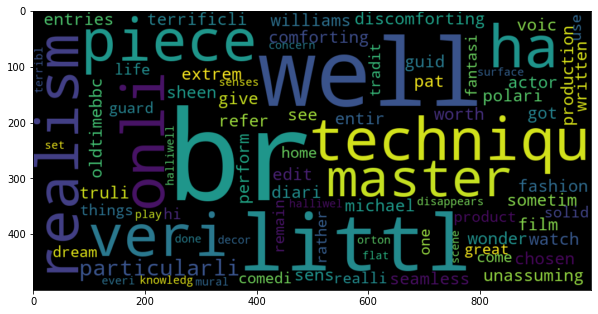

In [ ]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

Word cloud for negative review words


<function matplotlib.pyplot.show>

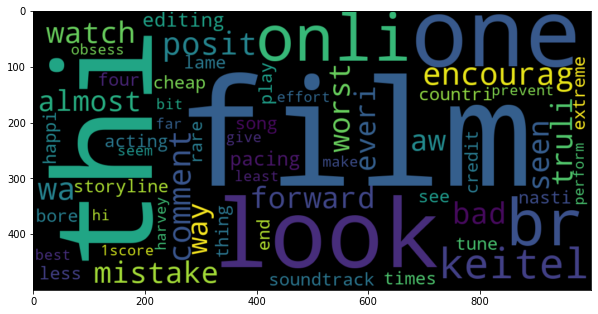

In [ ]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

Conclusion:- In this project we have Tokenized the words.

We have also used stemming and Lemmatization.

Also stopwords have been very usefull to remove the words that are not so necessary in those particular sentence.

Using tokenization has been very usefull.

We have used Logistic Regression method to find the accuracy, where we have found 75% of accuracy.

 So we will consider that Logistic Regression method works better in this dataset. 




